<h1 align="center">Introduction to Machine Learning - Course Code: 25737</h1>
<h4 align="center">Instructor: Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>
<h4 align="center">Computer Assignment 3</h4>
<h4 align="center">

Question 2

</h4>

# Personal Data

In [1]:
# Set your student number
student_number = 400101323
Name = 'Mahdi'
Last_Name = 'Zinati'

# Rules
- You are not allowed to add or remove cells. You **must use the provided space to write your code**. If you don't follow this rule, **your Practical Assignment won't be graded**.  

- Collaboration and using the internet is allowed, but your code **must be written by yourself**. **Copying code** from each other or from available resources will result in a **zero score for the assignment**.

- You are not allowed to use `torch.nn`, `torch.optim` and any activation function and loss function implemented in torch. 

## Question 1) Convolutional Neural Networks ``(50 pt.)``

In this question, you'll be coding up a convolutional neural network from scratch to classify images using PyTorch.  

### Instructions
- Install PyTorch following the instructions [here](https://pytorch.org/).
- Install the [`torchinfo` package](https://github.com/TylerYep/torchinfo) to visualize the network architecture and the number of parameters. The maximum number of parameters you are allowed to use for your network is **100,000**. 
- You are required to complete the functions defined in the code blocks following each question. Fill out sections of the code marked `"YOUR CODE HERE"`.
- You're free to add any number of methods within each class.
- You may also add any number of additional code blocks that you deem necessary.

### Data Preparation
In this assignment, we will use the Fashion-MNIST dataset. Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.  

#### Data

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255.  

#### Labels

Each training and test example is assigned to one of the following labels:

| Label | Description |
|-------|-------------|
| 0     | T-shirt/top |
| 1     | Trouser     |
| 2     | Pullover    |
| 3     | Dress       |
| 4     | Coat        |
| 5     | Sandal      |
| 6     | Shirt       |
| 7     | Sneaker     |
| 8     | Bag         |
| 9     | Ankle boot  |

Fashion-MNIST is included in the `torchvision` library.

In [6]:
# Import required packages
from torchvision.datasets import FashionMNIST
from torchvision.transforms import Compose, ToTensor, Normalize
import matplotlib.pyplot as plt
import numpy as np

In [19]:
!pip install torchinfo
!pip install ipywidgets==7.7.1

  Obtaining dependency information for torchinfo from https://files.pythonhosted.org/packages/72/25/973bd6128381951b23cdcd8a9870c6dcfc5606cb864df8eabd82e529f9c1/torchinfo-1.8.0-py3-none-any.whl.metadata
  Obtaining dependency information for ipywidgets==7.7.1 from https://files.pythonhosted.org/packages/fa/b2/4af75a543f6c3475a982e814fecd9bf13ba06210c64a6da85475a39bd16b/ipywidgets-7.7.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for widgetsnbextension~=3.6.0 from https://files.pythonhosted.org/packages/9c/a0/ba2634cd75b7d7f8f9aeb38edf854cd6c9877ec064013a62630b4541b88f/widgetsnbextension-3.6.6-py2.py3-none-any.whl.metadata


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 166.5 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 227.6 kB/s eta 0:00:0000:0100:01
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 4.0.5
    Uninstalling widgetsnbextension-4.0.5:
      Successfully uninstalled widgetsnbextension-4.0.5
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 8.0.4
    Uninstalling ipywidgets-8.0.4:
      Successfully uninstalled ipywidgets-8.0.4


In [3]:
# Transform to normalize the data and convert to a tensor
transform = Compose([ToTensor(), Normalize((0.5,), (0.5,))])

# Download the data
dataset = FashionMNIST('MNIST_data/', download = True, train = True, transform = transform)

100%|███████████████████████████| 26421880/26421880 [02:53<00:00, 152128.91it/s]


Extracting MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/FashionMNIST/raw



100%|█████████████████████████████████| 29515/29515 [00:00<00:00, 188282.91it/s]


Extracting MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/FashionMNIST/raw



100%|█████████████████████████████| 4422102/4422102 [00:22<00:00, 198593.58it/s]


Extracting MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/FashionMNIST/raw



100%|███████████████████████████████████| 5148/5148 [00:00<00:00, 476882.30it/s]

Extracting MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/FashionMNIST/raw



### Data Exploration
Let's take a look at the classes in our dataset.

In [4]:
print(dataset.classes)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Now, visualize an instance from each class.

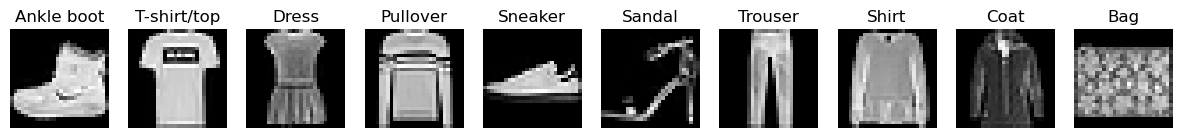

In [9]:
samples = {}

for i in range(len(dataset)):
    img, label = dataset[i]
    name = dataset.classes[label]
    if name not in class_samples:
        samples[name] = img
        if len(samples) == len(dataset.classes):
            break


fig, X = plt.subplots(1, len(dataset.classes), figsize=(15, 3))
for i, (name, sample) in enumerate(class_samples.items()):
    X[i].imshow(sample.squeeze().numpy(), cmap='gray')
    X[i].set_title(name)
    X[i].axis('off')

plt.show()

### Creating Training and Validation Datasets

The `split_indices` function takes in the size of the entire dataset, `n`, the fraction of data to be used as validation set, `val_frac`, and the random seed and returns the indices of the data points to be added to the validation dataset. 

In [10]:
def split_indices(n, val_frac, seed):
    # Determine the size of the validation set
    n_val = int(val_frac * n)
    np.random.seed(seed)
    # Create random permutation between 0 to n-1
    idxs = np.random.permutation(n)
    # Pick first n_val indices for validation set
    return idxs[n_val:], idxs[:n_val]

In [11]:
val_frac = 0.2 ## Set the fraction for the validation set
rand_seed = 42 ## Set the random seed

train_indices, val_indices = split_indices(len(dataset), val_frac, rand_seed)
print("number of samples in training set: {}".format(len(train_indices)))
print("number of samples in validation set: {}".format(len(val_indices)))

number of samples in training set: 48000
number of samples in validation set: 12000


Next, we make use of the built-in dataloaders in PyTorch to create iterables of our our training and validation sets. This helps in avoiding fitting the whole dataset into memory and only loads a batch of the data that we can decide. 

In [16]:
# Import required packages
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader
import torchvision.utils as vutils

In [14]:
######################
#   YOUR CODE HERE   #
######################
batch_size = 64 #Set the batch size

# Training sampler and data loader
train_sampler = SubsetRandomSampler(train_indices)
train_dl = DataLoader(dataset,
                     batch_size,
                     sampler=train_sampler)

# Validation sampler and data loader
val_sampler = SubsetRandomSampler(val_indices)
val_dl = DataLoader(dataset,
                   batch_size,
                   sampler=val_sampler)

Plot images in a sample batch of data.

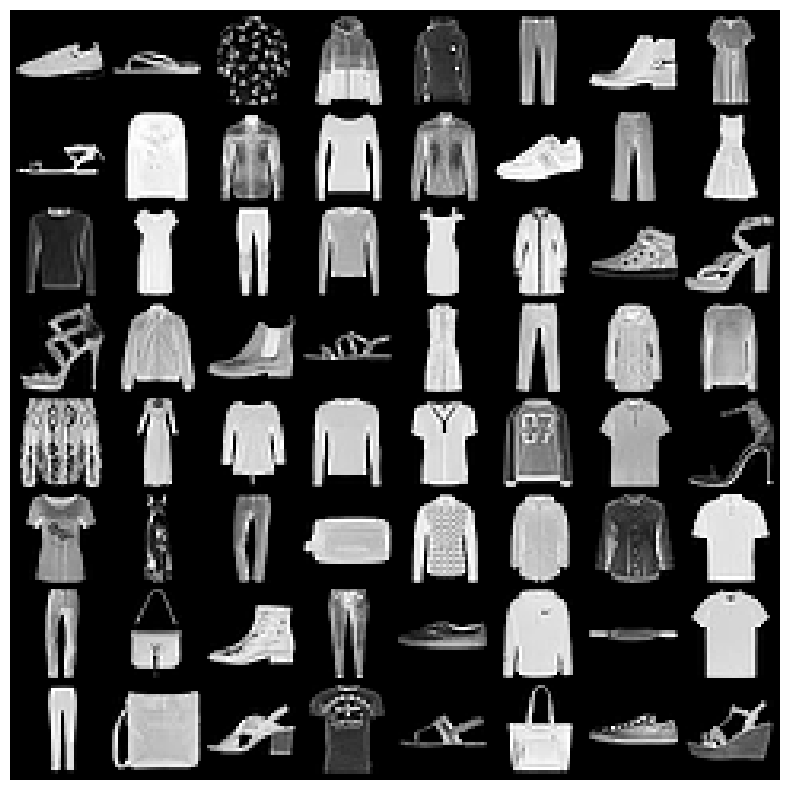

In [17]:
sample = next(iter(train_dl))

plt.figure(figsize=(10, 10))
plt.axis("off")
plt.imshow(
    np.transpose(
        vutils.make_grid(sample[0][:64], padding=2, normalize=True),
        (1, 2, 0)
    )
)
plt.show()

### Building the Model
Create your model by defining the network architecture in the `ImageClassifierNet` class.<br>
**NOTE:** The number of parameters in your network must be $\leq$ 100,000.

In [24]:
# Import required packages
import torch.nn as nn
import torch.nn.functional as F
from torchinfo import summary

In [31]:
class ImageClassifierNet(nn.Module):
    def __init__(self, n_channels=1):
        super(ImageClassifierNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=n_channels, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(in_features=32 * 7 * 7, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=10)  # Output layer for 10 classes
        pass
    def forward(self, X):
        X = self.pool(F.relu(self.conv1(X)))
        X = self.pool(F.relu(self.conv2(X)))
        X = X.view(-1, 32 * 7 * 7)
        X = F.relu(self.fc1(X))
        X = self.fc2(X)
        
        return X

In [32]:
model = ImageClassifierNet()

The following code block prints your network architecture. It also shows the total number of parameters in your network (see `Total params`).  

**NOTE: The total number of parameters in your model should be <= 100,000.**

In [33]:
summary(model, input_size=(batch_size, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
ImageClassifierNet                       [64, 10]                  --
├─Conv2d: 1-1                            [64, 16, 28, 28]          160
├─MaxPool2d: 1-2                         [64, 16, 14, 14]          --
├─Conv2d: 1-3                            [64, 32, 14, 14]          4,640
├─MaxPool2d: 1-4                         [64, 32, 7, 7]            --
├─Linear: 1-5                            [64, 128]                 200,832
├─Linear: 1-6                            [64, 10]                  1,290
Total params: 206,922
Trainable params: 206,922
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 79.17
Input size (MB): 0.20
Forward/backward pass size (MB): 9.70
Params size (MB): 0.83
Estimated Total Size (MB): 10.73

### Train the model
Complete the `train_model` function to train your model on a dataset. Tune your network architecture and hyperparameters on the validation set.

In [36]:
import torch
from tqdm.notebook import tqdm

class ConvLayer:
    def __init__(self, in_ch, out_ch, k_size, stride=1, pad=0):
        self.weight = torch.randn(out_ch, in_ch, k_size, k_size) * 0.01
        self.bias = torch.zeros(out_ch)
        self.stride, self.pad = stride, pad
        self.weight.requires_grad, self.bias.requires_grad = True, True

    def __call__(self, x):
        x = F.pad(x, (self.pad, self.pad, self.pad, self.pad))
        out_dim = (x.shape[-1] - self.weight.shape[-1]) // self.stride + 1
        out = torch.zeros((x.shape[0], self.weight.shape[0], out_dim, out_dim))
        for i in range(out_dim):
            for j in range(out_dim):
                x_slice = x[:, :, i * self.stride:i * self.stride + self.weight.shape[2], j * self.stride:j * self.stride + self.weight.shape[3]]
                out[:, :, i, j] = (x_slice.unsqueeze(1) * self.weight).sum(dim=(2, 3, 4)) + self.bias
        return out

class MaxPool:
    def __init__(self, k_size, stride):
        self.k_size, self.stride = k_size, stride

    def __call__(self, x):
        out_dim = (x.shape[-1] - self.k_size) // self.stride + 1
        out = torch.zeros((x.shape[0], x.shape[1], out_dim, out_dim))
        for i in range(out_dim):
            for j in range(out_dim):
                x_slice = x[:, :, i * self.stride:i * self.stride + self.k_size, j * self.stride:j * self.stride + self.k_size]
                out[:, :, i, j] = x_slice.max(dim=-1)[0].max(dim=-1)[0]
        return out

class ReLU:
    def __call__(self, x):
        return torch.max(x, torch.tensor(0.0))

class LinearLayer:
    def __init__(self, in_f, out_f):
        self.weight = torch.randn(out_f, in_f) * 0.01
        self.bias = torch.zeros(out_f)
        self.weight.requires_grad, self.bias.requires_grad = True, True

    def __call__(self, x):
        return x @ self.weight.T + self.bias

class CrossEntropyLoss:
    def __call__(self, out, targ):
        log_probs = F.log_softmax(out, dim=1)
        return -log_probs[range(len(targ)), targ].mean()

class SGD:
    def __init__(self, params, lr):
        self.params = params
        self.lr = lr

    def zero_grad(self):
        for param in self.params:
            if param.grad is not None:
                param.grad.zero_()

    def step(self):
        for param in self.params:
            if param.grad is not None:
                param.data -= self.lr * param.grad

class ImageClassifierNet:
    def __init__(self):
        self.conv1 = ConvLayer(1, 16, 3, stride=1, pad=1)
        self.conv2 = ConvLayer(16, 32, 3, stride=1, pad=1)
        self.pool = MaxPool(2, 2)
        self.relu = ReLU()
        self.fc1 = LinearLayer(32 * 7 * 7, 128)
        self.fc2 = LinearLayer(128, 10)

    def __call__(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

    def parameters(self):
        return [self.conv1.weight, self.conv1.bias, self.conv2.weight, self.conv2.bias, self.fc1.weight, self.fc1.bias, self.fc2.weight, self.fc2.bias]

def train_model(n_epochs, model, train_dl, val_dl, loss_fn, opt_fn, lr):
    optimizer = opt_fn(model.parameters(), lr=lr)
    train_losses, val_losses, train_accuracies, val_accuracies = [], [], [], []

    for epoch in range(n_epochs):
        model.train()
        running_loss, correct, total = 0.0, 0, 0

        for inputs, labels in tqdm(train_dl, desc=f"Epoch {epoch + 1}/{n_epochs}", leave=False):
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = loss_fn(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_loss = running_loss / len(train_dl.sampler)
        train_accuracy = correct / total

        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)

        if val_dl:
            model.eval()
            val_loss, correct, total = 0.0, 0, 0

            with torch.no_grad():
                for inputs, labels in val_dl:
                    outputs = model(inputs)
                    loss = loss_fn(outputs, labels)
                    val_loss += loss.item() * inputs.size(0)
                    _, predicted = torch.max(outputs.data, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()

            val_loss /= len(val_dl.dataset) if val_dl else 1
            val_accuracy = correct / total

            val_losses.append(val_loss)
            val_accuracies.append(val_accuracy)

            print(f"Epoch {epoch + 1}/{n_epochs}.. Train loss: {train_loss:.3f}.. Train accuracy: {train_accuracy:.3f}.. Val loss: {val_loss:.3f}.. Val accuracy: {val_accuracy:.3f}")
        else:
            print(f"Epoch {epoch + 1}/{n_epochs}.. Train loss: {train_loss:.3f}.. Train accuracy: {train_accuracy:.3f}")

    return model, train_losses, val_losses, train_accuracies, val_accuracies


In [37]:
######################
#   YOUR CODE HERE   #
######################
num_epochs = 10 # Number of training epochs
loss_fn = CrossEntropyLoss() # Define the loss function
opt_fn = SGD # Select an optimizer
lr = 0.001 # Set the learning rate

In [38]:
model, train_losses, val_losses, train_accuracies, val_accuracies = train_model(num_epochs, model, train_dl, val_dl, loss_fn, opt_fn, lr)

Epoch 1/10:   0%|          | 0/750 [00:00<?, ?it/s]

Epoch 1/10.. Train loss: 2.218.. Train accuracy: 0.380.. Val loss: 0.420.. Val accuracy: 0.505


Epoch 2/10:   0%|          | 0/750 [00:00<?, ?it/s]

Epoch 2/10.. Train loss: 1.819.. Train accuracy: 0.538.. Val loss: 0.293.. Val accuracy: 0.626


Epoch 3/10:   0%|          | 0/750 [00:00<?, ?it/s]

Epoch 3/10.. Train loss: 1.178.. Train accuracy: 0.667.. Val loss: 0.195.. Val accuracy: 0.697


Epoch 4/10:   0%|          | 0/750 [00:00<?, ?it/s]

Epoch 4/10.. Train loss: 0.856.. Train accuracy: 0.716.. Val loss: 0.156.. Val accuracy: 0.728


Epoch 5/10:   0%|          | 0/750 [00:00<?, ?it/s]

Epoch 5/10.. Train loss: 0.728.. Train accuracy: 0.743.. Val loss: 0.139.. Val accuracy: 0.750


Epoch 6/10:   0%|          | 0/750 [00:00<?, ?it/s]

Epoch 6/10.. Train loss: 0.666.. Train accuracy: 0.760.. Val loss: 0.130.. Val accuracy: 0.764


Epoch 7/10:   0%|          | 0/750 [00:00<?, ?it/s]

Epoch 7/10.. Train loss: 0.628.. Train accuracy: 0.773.. Val loss: 0.124.. Val accuracy: 0.772


Epoch 8/10:   0%|          | 0/750 [00:00<?, ?it/s]

Epoch 8/10.. Train loss: 0.601.. Train accuracy: 0.784.. Val loss: 0.119.. Val accuracy: 0.786


Epoch 9/10:   0%|          | 0/750 [00:00<?, ?it/s]

Epoch 9/10.. Train loss: 0.579.. Train accuracy: 0.791.. Val loss: 0.115.. Val accuracy: 0.791


Epoch 10/10:   0%|          | 0/750 [00:00<?, ?it/s]

Epoch 10/10.. Train loss: 0.562.. Train accuracy: 0.797.. Val loss: 0.113.. Val accuracy: 0.796


### Plot loss and accuracy

In [39]:
def plot_accuracy(train_accuracies, val_accuracies):
    """Plot accuracies"""
    plt.plot(train_accuracies, "-x")
    plt.plot(val_accuracies, "-o")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(["Training", "Validation"])
    plt.title("Accuracy vs. No. of epochs")

def plot_losses(train_losses, val_losses):
    """Plot losses"""
    plt.plot(train_losses, "-x")
    plt.plot(val_losses, "-o")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["Training", "Validation"])
    plt.title("Loss vs. No. of Epochs")

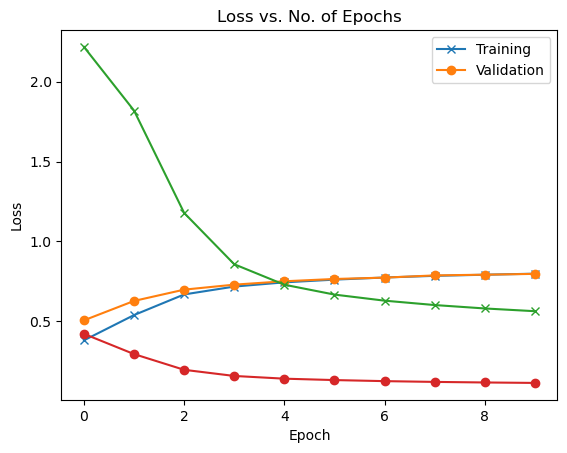

In [40]:
plot_accuracy(train_accuracies, val_accuracies)
plot_losses(train_losses, val_losses)

### Train a model on the entire dataset

In [41]:
indices, _ = split_indices(len(dataset), 0, rand_seed)

sampler = SubsetRandomSampler(indices)
dl = DataLoader(dataset, batch_size, sampler=sampler)

In [42]:
######################
#   YOUR CODE HERE   #
######################
num_epochs = 20 # Max number of training epochs
lr = 0.001 # Set the learning rate

In [43]:
model, _, _, _, _ = train_model(num_epochs, model, dl, [], loss_fn, opt_fn, lr)

Epoch 1/20:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 1/20.. Train loss: 0.546.. Train accuracy: 0.803


Epoch 2/20:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 2/20.. Train loss: 0.530.. Train accuracy: 0.809


Epoch 3/20:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 3/20.. Train loss: 0.515.. Train accuracy: 0.815


Epoch 4/20:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 4/20.. Train loss: 0.501.. Train accuracy: 0.820


Epoch 5/20:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 5/20.. Train loss: 0.489.. Train accuracy: 0.826


Epoch 6/20:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 6/20.. Train loss: 0.478.. Train accuracy: 0.830


Epoch 7/20:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 7/20.. Train loss: 0.468.. Train accuracy: 0.833


Epoch 8/20:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 8/20.. Train loss: 0.459.. Train accuracy: 0.837


Epoch 9/20:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 9/20.. Train loss: 0.450.. Train accuracy: 0.840


Epoch 10/20:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 10/20.. Train loss: 0.441.. Train accuracy: 0.843


Epoch 11/20:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 11/20.. Train loss: 0.433.. Train accuracy: 0.846


Epoch 12/20:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 12/20.. Train loss: 0.426.. Train accuracy: 0.848


Epoch 13/20:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 13/20.. Train loss: 0.420.. Train accuracy: 0.852


Epoch 14/20:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 14/20.. Train loss: 0.414.. Train accuracy: 0.854


Epoch 15/20:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 15/20.. Train loss: 0.409.. Train accuracy: 0.855


Epoch 16/20:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 16/20.. Train loss: 0.403.. Train accuracy: 0.858


Epoch 17/20:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 17/20.. Train loss: 0.399.. Train accuracy: 0.859


Epoch 18/20:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 18/20.. Train loss: 0.395.. Train accuracy: 0.860


Epoch 19/20:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 19/20.. Train loss: 0.391.. Train accuracy: 0.862


Epoch 20/20:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 20/20.. Train loss: 0.387.. Train accuracy: 0.863


### Check Predictions
Now, you should evaluate your model on dataset. Specifically, you should calculate the class probabilities for each image, and then visualize these probabilities along with the image itself. Please include a function `view_prediction` in your code that takes an image, its label, the calculated probabilities, and the list of class names as input, and plots the image along with the probabilities.

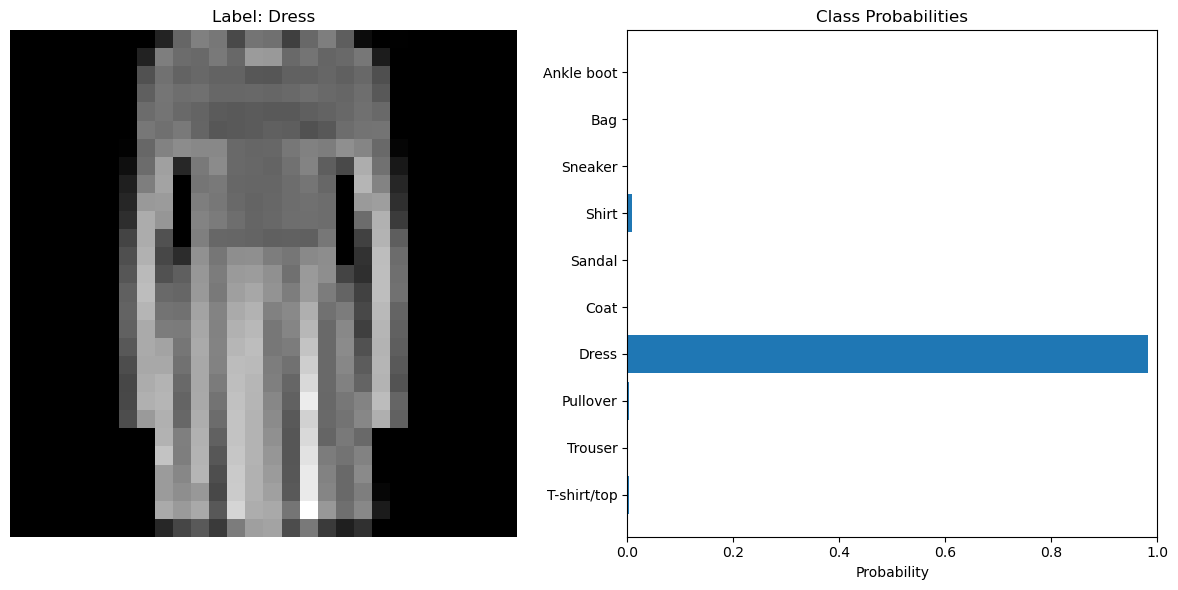

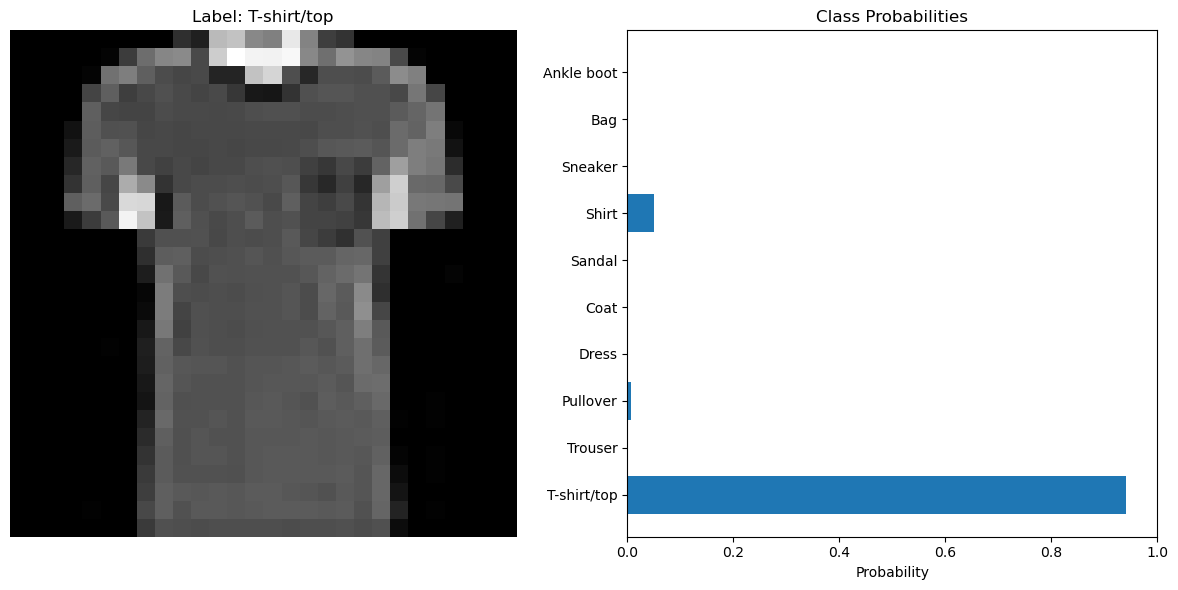

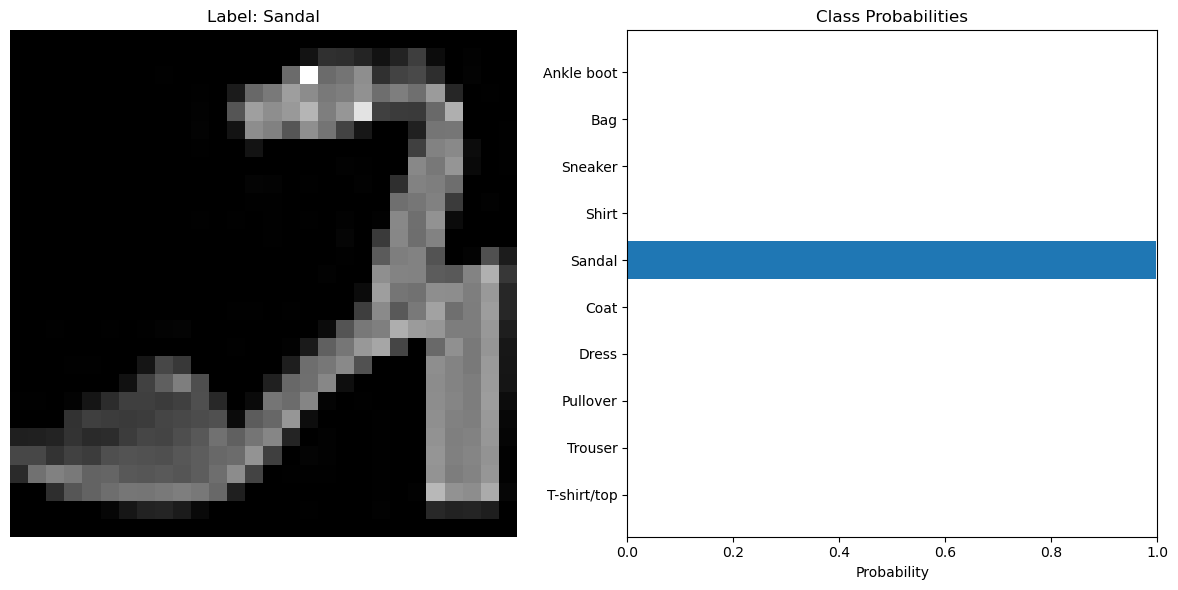

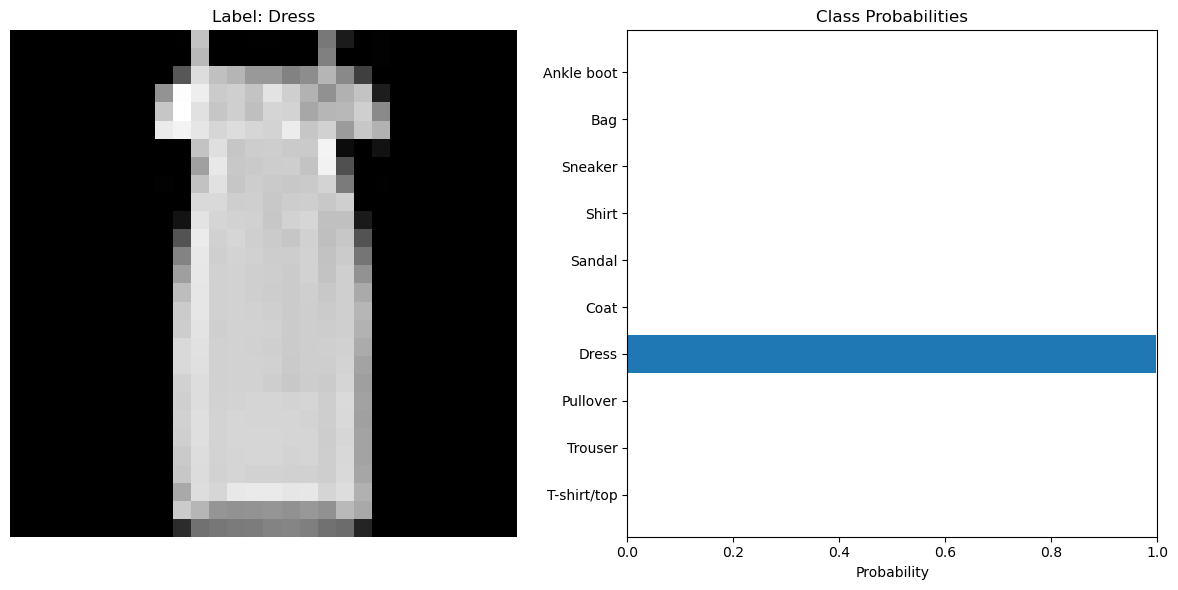

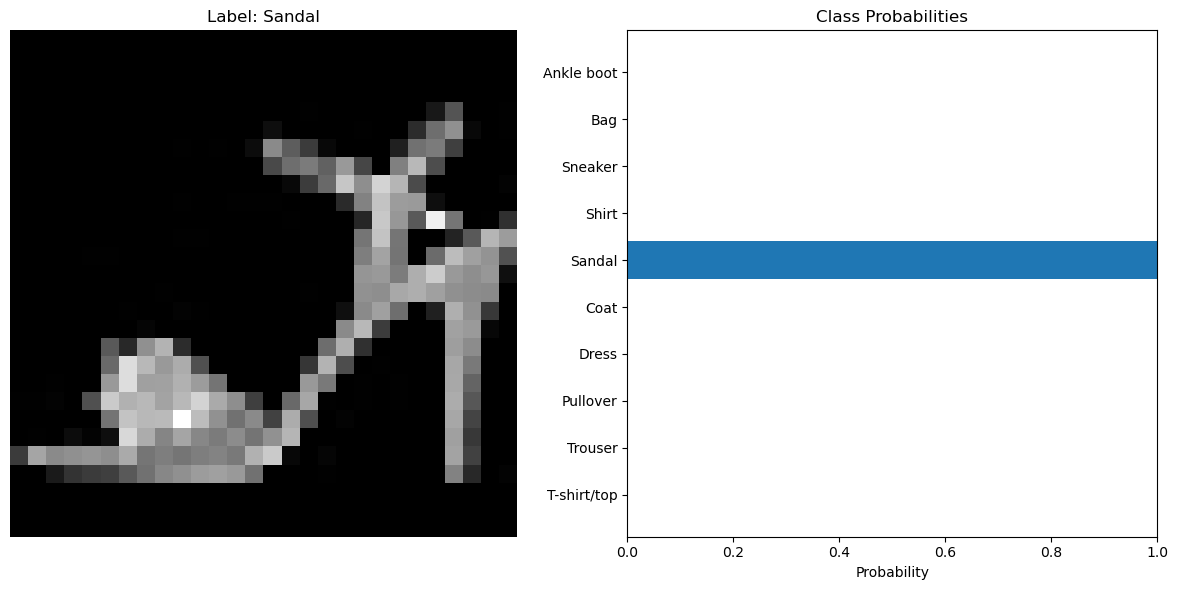

In [48]:
def view_prediction(image, label, probabilities, class_names):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(f"Label: {class_names[label]}")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.barh(class_names, probabilities)
    plt.xlabel('Probability')
    plt.title('Class Probabilities')
    plt.xlim(0, 1)

    plt.tight_layout()
    plt.show()

model.eval()
samples = np.random.choice(indices, size=5, replace=False)

for i in samples:
    image, label = dataset[i]
    with torch.no_grad():
        prd = model(image.unsqueeze(0))
        probabilities = torch.nn.functional.softmax(prd, dim=1).squeeze().numpy()

    view_prediction(image.squeeze().numpy(), label, probabilities, dataset.classes)

### Save the model

In [53]:
torch.save(model, 'model')

### Calculate accuracy on the test set

In [47]:
test_dataset = FashionMNIST('MNIST_data/', download = True, train = False, transform = transform)
test_dl = DataLoader(test_dataset, batch_size)

In [51]:
def evaluate(model, test_dl):
    model.eval()
    correct, total = 0, 0

    with torch.no_grad():
        for inputs, labels in test_dl:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_accuracy = correct / total
    return test_accuracy

In [52]:
print("Test Accuracy = {:.4f}".format(evaluate(model, test_dl)))

Test Accuracy = 0.8489
